<a href="https://colab.research.google.com/github/McNealFielies/McNealFielies.github.io/blob/main/California_Housing_Price_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the necessary Libiries**




In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import folium
from folium.plugins import MarkerCluster

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

## **Adding the Data to a Pandas DataFrame**

In [6]:
house_price_dataframe = pd.DataFrame(housing.data, columns= housing.feature_names)

In [7]:
house_price_dataframe.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [9]:
# Lets add the price calumn (target) to the dataframe

house_price_dataframe['Price'] = housing.target

In [10]:
# Lets see if there price calumn have been added to the dataframe
house_price_dataframe.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

# **Statistical Analysis**

In [11]:
# Lets see how many rows and columns we have in total

house_price_dataframe.shape


(20640, 9)

In [12]:
# Information

house_price_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
# Looking at the Statistical Description

house_price_dataframe.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         Price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

In [14]:
# Checking for any Null Values in each column

house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [46]:
print('The average Median Income is            :' ,house_price_dataframe['MedInc'].mean())
print('The average House Age is                :' ,house_price_dataframe['HouseAge'].mean())
print('The average BedRooms is                 :' ,house_price_dataframe['AveBedrms'].mean())
print('The average Population is               :' ,house_price_dataframe['Population'].mean())
print('The average number of household members :' ,house_price_dataframe['AveOccup'].mean())


The average Median Income is            : 3.8706710029069766
The average House Age is                : 28.639486434108527
The average BedRooms is                 : 1.096675149606208
The average Population is               : 1425.4767441860465
The average number of household members : 3.0706551594363742


# **Data Visualizations**

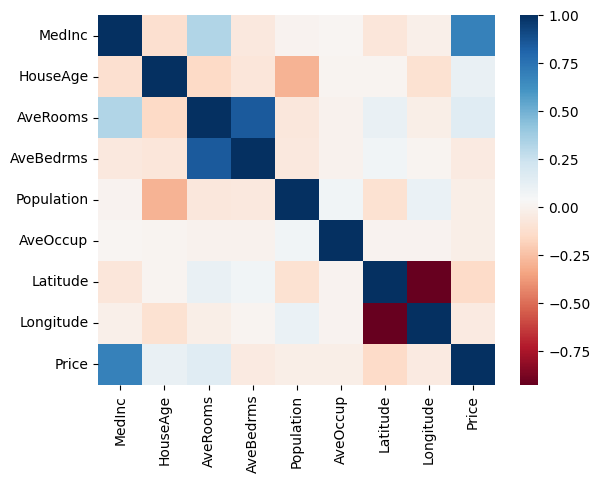

In [18]:
# Creating a Heatmap to see the correlation between each column

sns.heatmap(house_price_dataframe.corr(), cmap='RdBu');

In [32]:
# Create a Folium map object
map = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=10)

# Create a MarkerCluster object
marker_cluster = MarkerCluster().add_to(map)

# Add markers to the marker cluster
for index, row in data.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']]).add_to(marker_cluster)



# Display the map
map

# **Splitting the Data Into Features and Targets**

In [49]:
# Splitting the data into features and tagets

X = house_price_dataframe.drop(['Price'], axis=1)
Y = house_price_dataframe['Price']

In [52]:
# Lets check if the data have been splitted by printing X and Y

print(X)


       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [53]:
print(Y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64


# **Splitting the data into Training data and Testing Data**

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [55]:
# Let's see if the test data has been split into 20%

print(X.shape,X_test.shape,X_train.shape)

(20640, 8) (4128, 8) (16512, 8)


# **Model Training**

XGBoost Regressor

In [60]:
# Loading the model

model = XGBRegressor()


In [61]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# **Model Evaluation**


Now lets predict on our training model

In [62]:
training_data_prediction = model.predict(X_train)

In [65]:
print(training_data_prediction)

[0.6893792  2.986824   0.48874274 ... 1.8632544  1.7800125  0.7565893 ]


In [66]:
# R square error

score_1 = metrics.r2_score(Y_train, training_data_prediction)

# mean absolute error

score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("The R Square Error :", score_1)
print("The Mean Absolute Error :", score_2)

The R Square Error : 0.9451221492760822
The Mean Absolute Error : 0.1919170860794262


# **Let's Visualize Predict the Actual Price and the Predicted Price**

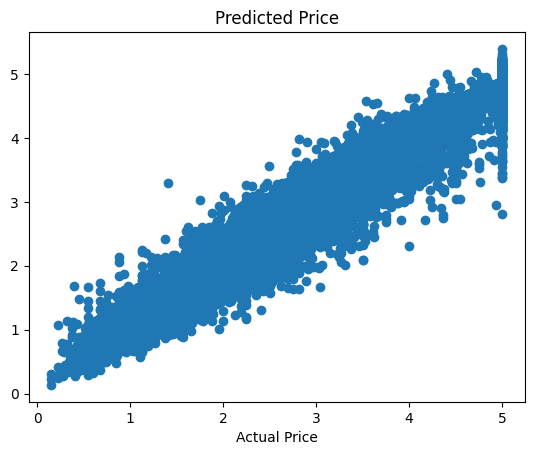

In [67]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.title("Predicted Price")
plt.show()

Predicting on Test Data

In [68]:
testing_data_prediction = model.predict(X_test)

In [70]:
# R square error

score_1 = metrics.r2_score(Y_test, testing_data_prediction)

# mean absolute error

score_2 = metrics.mean_absolute_error(Y_test, testing_data_prediction)

print("The R Square Error :", score_1)
print("The Mean Absolute Error :", score_2)

The R Square Error : 0.8412904408180302
The Mean Absolute Error : 0.30753655785801337


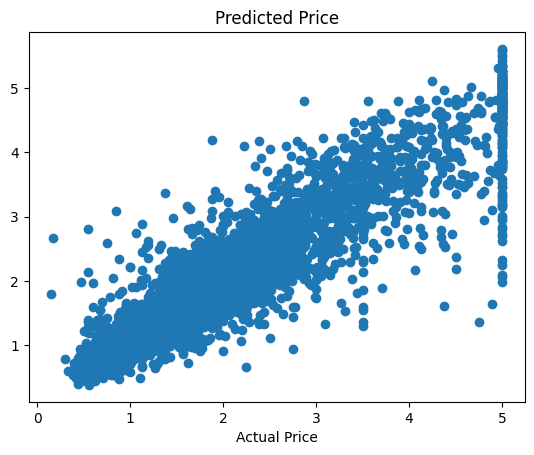

In [72]:
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel('Actual Price')
plt.title("Predicted Price")
plt.show()